In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib
plt.rcParams['figure.figsize'] = (10,5)
import pandas as pd
import numpy as np
pd.set_option('display.max_colwidth',150)
import sys,os
import json
import numpy as np

In [2]:
sample_data = pd.Series(np.random.random(100)*23)

In [3]:
sample_data.head(20)

0      2.505322
1     21.693688
2      0.921116
3     14.958392
4      4.282912
5     14.794332
6     17.182106
7     14.439496
8     20.484571
9      5.867047
10    22.235413
11     9.942888
12    20.116035
13    19.238155
14    16.887363
15    21.379628
16    10.611772
17    20.626443
18     2.314714
19    18.817152
dtype: float64

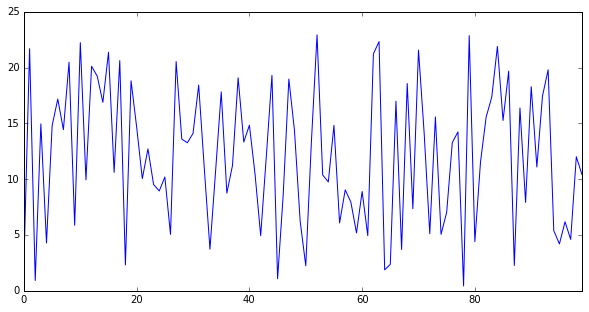

In [4]:
sample_data.plot()

In [5]:
sample_data.iloc[99]=19

In [6]:
sample_data.sum()/100

12.166287015668333

In [7]:
sample_data.describe()

count    100.000000
mean      12.166287
std        6.341856
min        0.434431
25%        6.245820
50%       12.382566
75%       17.544616
max       22.937954
dtype: float64

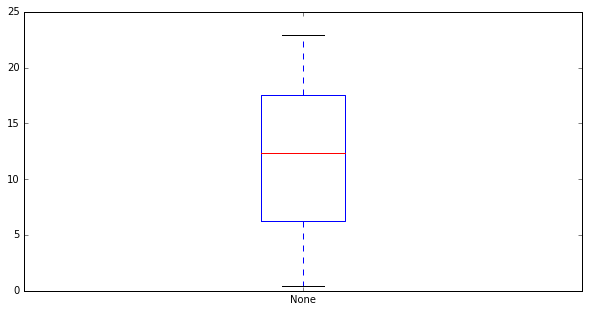

In [8]:
sample_data.plot.box()

In [9]:
sample_data.value_counts()

19.688744    1
5.057721     1
12.016236    1
8.753112     1
20.484571    1
19.089719    1
5.186530     1
14.351012    1
12.047160    1
7.038084     1
17.452165    1
5.395007     1
14.439496    1
3.727322     1
16.380712    1
10.381883    1
21.570707    1
16.982809    1
15.579888    1
14.828235    1
14.794332    1
18.817152    1
14.958392    1
14.656829    1
13.284110    1
7.356728     1
3.702971     1
9.045670     1
6.266083     1
19.238155    1
            ..
10.952251    1
10.717441    1
4.940052     1
20.116035    1
2.241864     1
12.717971    1
1.082664     1
2.505322     1
11.093808    1
7.921085     1
2.265063     1
0.921116     1
9.753013     1
11.238696    1
20.546917    1
18.435832    1
8.943281     1
9.942888     1
19.000000    1
8.626397     1
7.950509     1
5.119117     1
11.533590    1
4.946548     1
21.235747    1
6.185030     1
2.374628     1
10.611772    1
4.282912     1
22.235413    1
dtype: int64

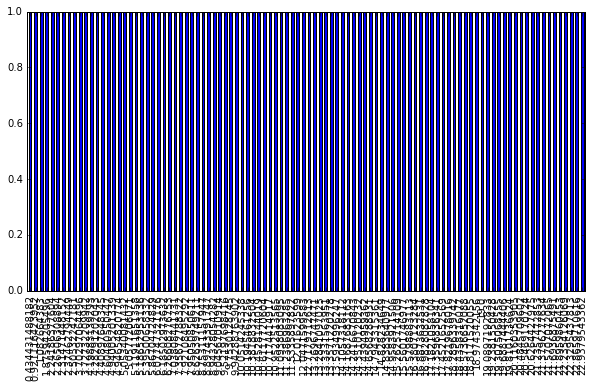

In [10]:
sample_data.value_counts().sort_index().plot.bar()

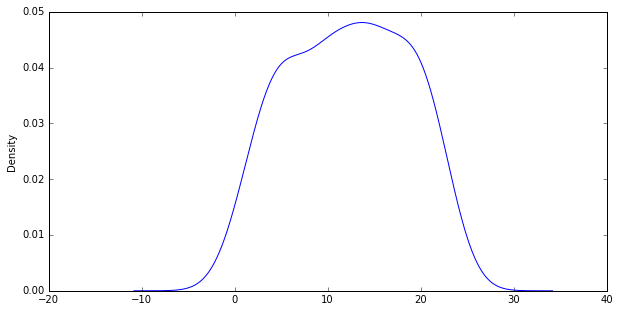

In [11]:
sample_data.plot(kind='kde')

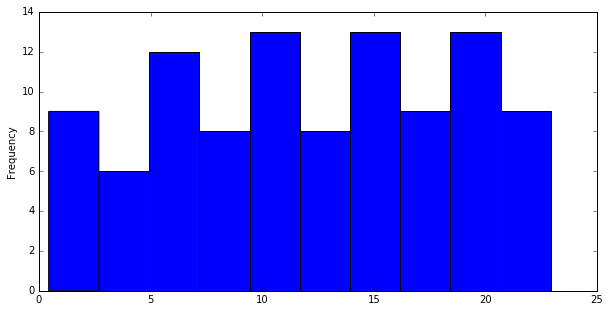

In [12]:
sample_data.plot.hist()

In [13]:
sc_data = pd.read_csv('spot_check_data.csv.bz2')

/Users/manojlds/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (22,49,50,52,53,54,55,56,57,58,60,61,62,63,64,65,66,68,69,70,72,73,74,76,77,78,79,80,81,82,83,84) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [14]:
sc_data.columns

Index([u'Unnamed: 0', u'id', u'job_id', u't_created', u't_info', u'tr_created',
       u'tr_info', u'start_time', u'finish_time', u'additionalAttributes',
       u'availability', u'brandName', u'brandText', u'breadCrumbs',
       u'categoryNamePath', u'currency', u'description', u'imageUrl',
       u'listPrice', u'mpns', u'productUrl', u'salePrice', u'seller', u'sku',
       u'storeId', u'storeName', u'title', u'upcs', u'url',
       u'variantAttributes', u'WrongURL', u'additionalAttributes_status',
       u'availability_status', u'brandName_status', u'brandText_status',
       u'breadCrumbs_status', u'categoryNamePath_status', u'comments',
       u'currency_status', u'description_status', u'imageUrl_status',
       u'listPrice_status', u'mpns_status', u'salePrice_status', u'sku_status',
       u'title_status', u'upcs_status', u'variantAttributes_status',
       u'variantCOLOR_status', u'variantColoe_status',
       u'variantColorCode_status', u'variantColor_status',
       u'variantCo

In [15]:
sc_data.breadCrumbs_status.value_counts()

Correct       4340
Notpresent    1245
Incorrect      747
Missed         291
Name: breadCrumbs_status, dtype: int64

In [16]:
sc_data.categoryNamePath_status.value_counts()

Correct      5021
Incorrect    1595
Missed          7
Name: categoryNamePath_status, dtype: int64

## Questions:

1.  How many words are present in title? Analyse the distribution of no of words in title
2.  How many words are present in breadcrumbs? Analyse the distribution of no of words in breadcrumbs
3. How many samples did we misclassify in total?
4. What is probability of misclassifying a sample?
5. How many samples are misclassified when the breadcrumbs are invalid
6. What is the probability that breadcrumbs are invalid
7. What is the probability of correct category given the breadcrumb is invalid
8. Which toplevel category contains most invalid breadcrumbs (edited)

http://pandas.pydata.org/pandas-docs/stable/10min.html

In [31]:
sc_data["title"].apply(lambda x: len(x.split())).value_counts().sort_index()

1        96
2       314
3       661
4      1050
5      1112
6      1105
7      1098
8       849
9       658
10      454
11      329
12      202
13      143
14       91
15       68
16       34
17       45
18       31
19       32
20       12
21       10
22        9
23        9
24        6
25        1
26        9
27        9
28        5
29        4
30        2
31        2
33        1
34        3
37        1
38        1
39        3
42        2
44        2
45        3
47        1
52        2
60        2
64        4
73        4
186       2
Name: title, dtype: int64

In [32]:
sc_data["breadCrumbs"].apply(lambda c: len([y for x in (c.split(' > ') if type(c) == str else []) for y in x.split()])).value_counts().sort_index()

0     2059
1      991
2      384
3      453
4      860
5      774
6      810
7      570
8      450
9      319
10     226
11     172
12     106
13      71
14      54
15      53
16      27
17      36
18      15
19      10
20      10
21       2
22       5
23       6
24       3
27       5
29       1
30       2
31       3
33       2
37       2
Name: breadCrumbs, dtype: int64

In [33]:
classified = sc_data["categoryNamePath_status"].value_counts()

In [34]:
classified

Correct      5021
Incorrect    1595
Missed          7
Name: categoryNamePath_status, dtype: int64

In [23]:
float(classified["Incorrect"])/len(sc_data)

0.1880674448767834

In [24]:
len(sc_data)

8481

In [35]:
sc_data[sc_data.breadCrumbs_status == "Incorrect"]["categoryNamePath_status"].value_counts()

Correct      553
Incorrect    194
Name: categoryNamePath_status, dtype: int64

In [36]:
float(len(sc_data[sc_data.breadCrumbs_status == "Incorrect"]))/len(sc_data)

0.08807923593915812

In [38]:
len(sc_data[sc_data.breadCrumbs_status == "Incorrect"][sc_data.categoryNamePath_status == "Correct"])/float(len(sc_data))

/Users/manojlds/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


0.06520457493220139

In [28]:
sc_data[sc_data.breadCrumbs.isnull()][sc_data.categoryNamePath_status == "Correct"]["categoryNamePath"].apply(lambda x: x.split(' > ')[0]).value_counts()

/Users/manojlds/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


Clothing & Accessories      288
Shoes                       159
Health & Personal Care      132
Home & Kitchen               94
Sports & Outdoors            91
Jewelry                      70
Tools & Home Improvement     39
Patio, Lawn & Garden         27
Grocery & Gourmet Food       20
Computers & Accessories      18
Furniture                    16
Electronics                  15
Media                        14
Toys & Games                 12
Baby Products                11
Office Products              10
Additional                    5
Industrial & Scientific       5
Automotive                    5
Video Games                   4
Pet Supplies                  3
Software                      1
Arts, Crafts & Sewing         1
Name: categoryNamePath, dtype: int64